In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys


In [5]:
df=pd.read_csv('TSLA.CSV')

In [6]:
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2019-05-21,39.551998,41.480000,39.208000,41.015999,90019500,0,0.0
1,2019-05-22,39.820000,40.787998,38.355999,38.546001,93426000,0,0.0
2,2019-05-23,38.868000,39.894001,37.243999,39.098000,132735500,0,0.0
3,2019-05-24,39.966000,39.995998,37.750000,38.125999,70683000,0,0.0
4,2019-05-28,38.240002,39.000000,37.570000,37.740002,51564500,0,0.0


In [9]:
##Univariate time series
stock_data=df[["Date","Close"]]

In [10]:
stock_data.head()

,Date,Close
0,2019-05-21,41.015999
1,2019-05-22,38.546001
2,2019-05-23,39.098000
3,2019-05-24,38.125999
4,2019-05-28,37.740002


## EDA

In [11]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    758 non-null    object 
 1   Close   758 non-null    float64
dtypes: float64(1), object(1)
memory usage: 12.0+ KB


In [14]:
stock_data["Date"]=pd.to_datetime(stock_data["Date"])

C:\Users\HP\AppData\Local\Temp\ipykernel_7640\2574456454.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data["Date"]=pd.to_datetime(stock_data["Date"])


In [15]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    758 non-null    datetime64[ns]
 1   Close   758 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 12.0 KB


In [16]:
stock_data.head(2)

,Date,Close
0,2019-05-21,41.015999
1,2019-05-22,38.546001


In [19]:
stock_data=stock_data.set_index("Date")

In [20]:
stock_data

,Close
Date,
2019-05-21,41.015999
2019-05-22,38.546001
2019-05-23,39.098000
2019-05-24,38.125999
2019-05-28,37.740002
...,...
2022-05-16,724.369995
2022-05-17,761.609985
2022-05-18,709.809998


In [21]:
stock_data.describe()

,Close
count,758.000000
mean,485.531513
std,353.160353
min,35.793999
25%,112.323500
50%,488.125000
75%,762.142502
max,1229.910034


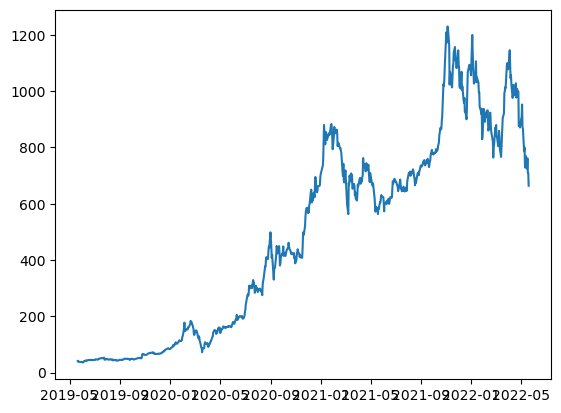

In [23]:
plt.plot(stock_data.Close)

(array([228.,  57.,  38.,  59.,  50., 127.,  81.,  44.,  59.,  15.]),
 array([  35.79399872,  155.20560226,  274.61720581,  394.02880936,
         513.4404129 ,  632.85201645,  752.26362   ,  871.67522354,
         991.08682709, 1110.49843063, 1229.91003418]),
 <BarContainer object of 10 artists>)

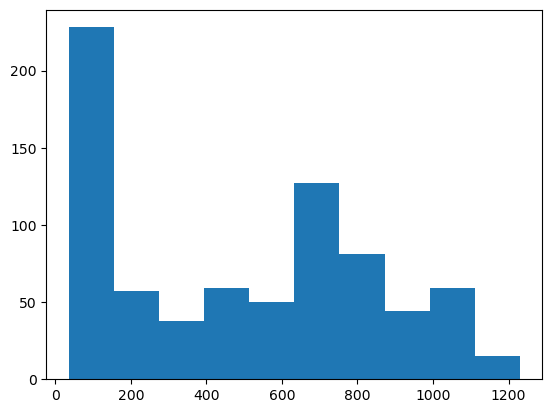

In [24]:
plt.hist(stock_data.Close)

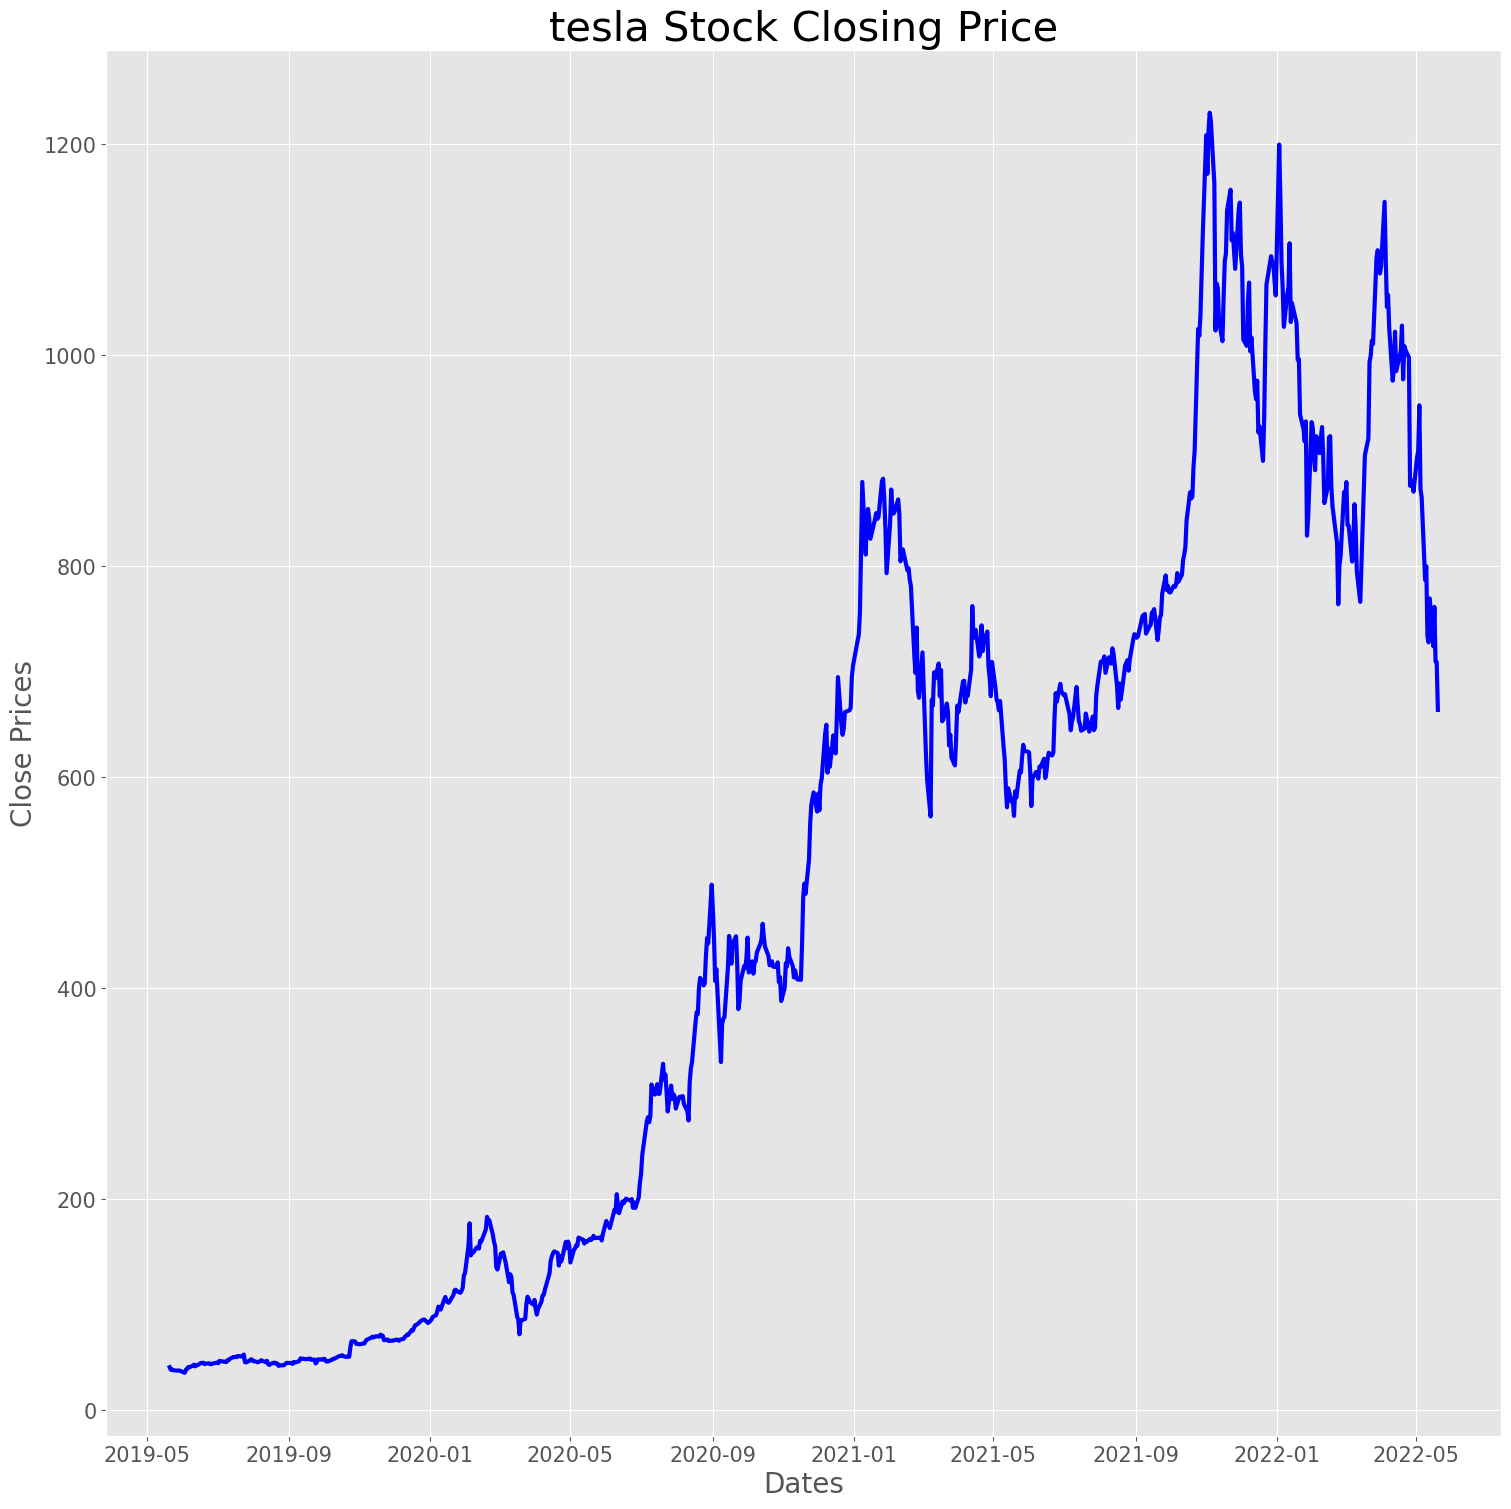

In [27]:
plt.style.use('ggplot')
plt.figure(figsize=(18,18))
plt.grid(True)
plt.xlabel('Dates',fontsize=20)
plt.xticks(fontsize=15)
plt.ylabel('Close Prices',fontsize=20)
plt.yticks(fontsize=15)
plt.plot(stock_data['Close'],linewidth=3,color='blue')
plt.title('tesla Stock Closing Price',fontsize=30)
plt.show()

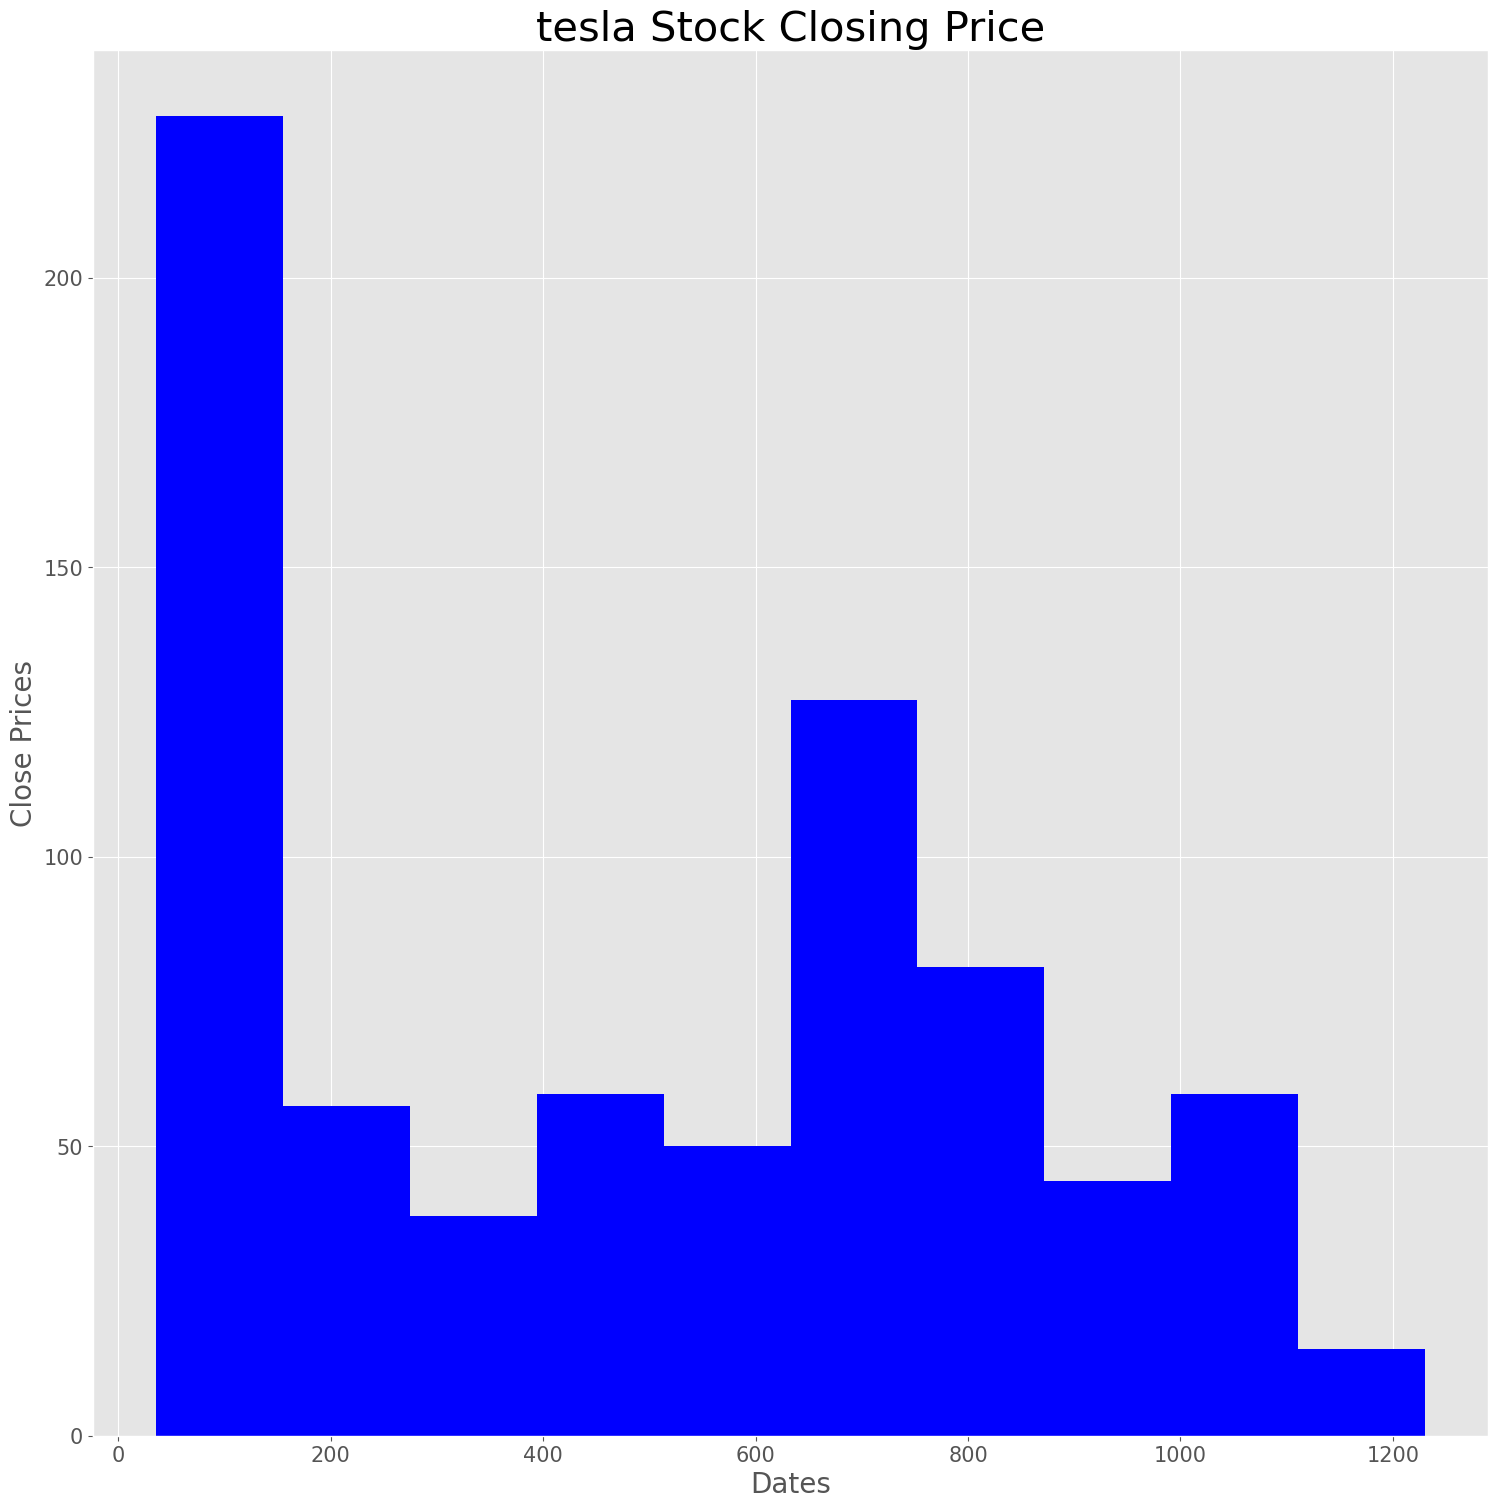

In [28]:
plt.style.use('ggplot')
plt.figure(figsize=(18,18))
plt.grid(True)
plt.xlabel('Dates',fontsize=20)
plt.xticks(fontsize=15)
plt.ylabel('Close Prices',fontsize=20)
plt.yticks(fontsize=15)
plt.hist(stock_data['Close'],linewidth=3,color='blue')
plt.title('tesla Stock Closing Price',fontsize=30)
plt.show()

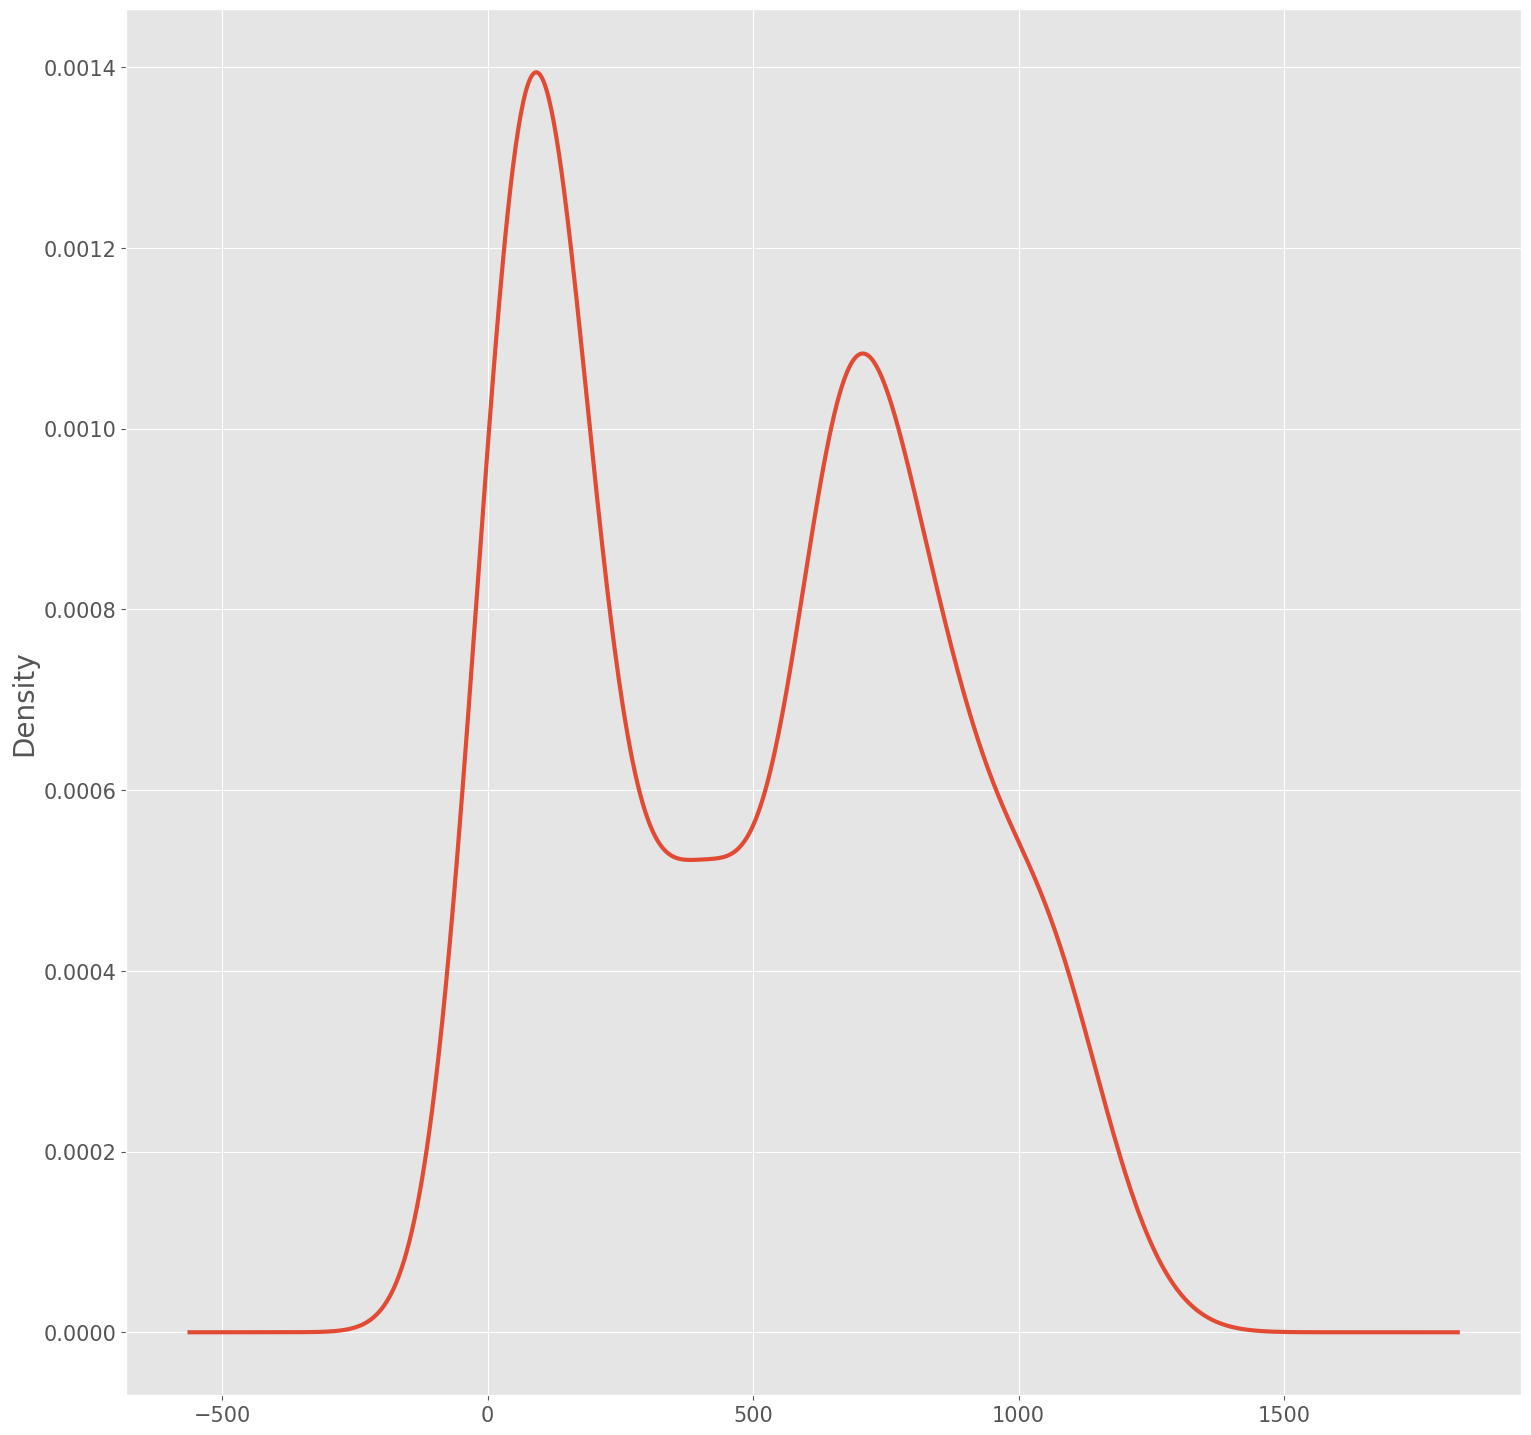

In [29]:
df_close=stock_data['Close']
df_close.plot(kind='kde',figsize=(18,18),linewidth=3)
plt.xticks(fontsize=15)
plt.grid("both")
plt.ylabel('Density',fontsize=20)
plt.yticks(fontsize=15)
plt.show()

In [84]:
rolmean=stock_data['Close'].rolling(48).mean()

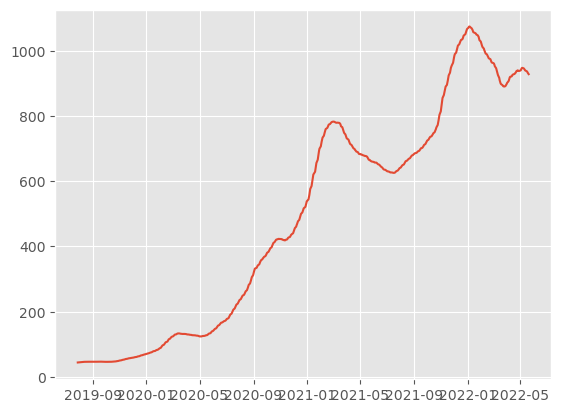

In [85]:
plt.plot(rolmean)

In [86]:
rolstd=stock_data['Close'].rolling(48).std()

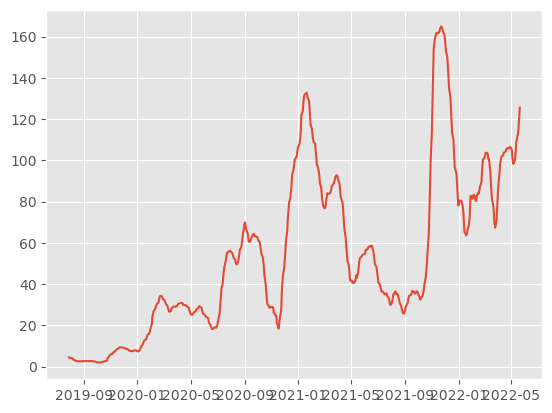

In [87]:
plt.plot(rolstd)

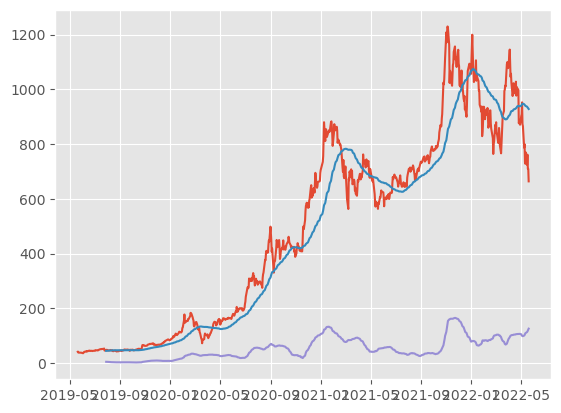

In [88]:
plt.plot(stock_data.Close)
plt.plot(rolmean)
plt.plot(rolstd)

In [89]:
from statsmodels.tsa.stattools import adfuller
adft=adfuller(stock_data['Close'])


In [90]:
adft

(-1.363008581703749,
 0.5998762543050697,
 9,
 748,
 {'1%': -3.43912257105195,
  '5%': -2.8654117005229844,
  '10%': -2.568831705010152},
 6794.359259220987)

In [91]:
pd.Series(adft[0:4],index=['test stats','p-value','lag','data point'])

test stats     -1.363009
p-value         0.599876
lag             9.000000
data point    748.000000
dtype: float64

In [92]:
#Test for staionarity
def test_stationarity(timeseries):
    # Determing rolling statistics
    rolmean = timeseries.rolling(48).mean() # rolling mean
    rolstd = timeseries.rolling(48).std() # rolling standard deviation
    # Plot rolling statistics:
    plt.figure(figsize = (18,8))
    plt.grid('both')
    plt.plot(timeseries, color='blue',label='Original', linewidth = 3)
    plt.plot(rolmean, color='red', label='Rolling Mean',linewidth = 3)
    plt.plot(rolstd, color='black', label = 'Rolling Std',linewidth = 4)
    plt.legend(loc='best', fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')
    plt.title('Rolling Mean and Standard Deviation', fontsize = 25)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    # hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    

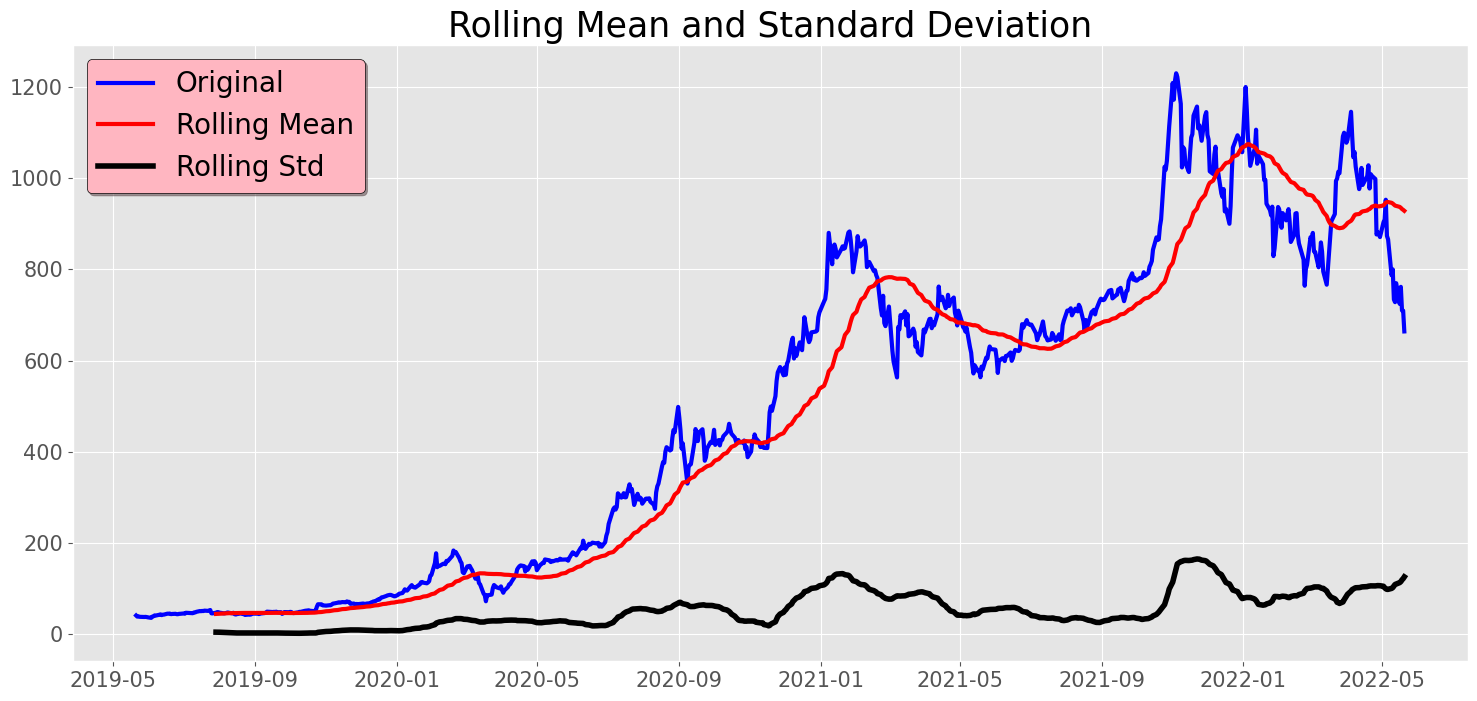

Results of dickey fuller test
Test Statistics                 -1.363009
p-value                          0.599876
No. of lags used                 9.000000
Number of observations used    748.000000
critical value (1%)             -3.439123
critical value (5%)             -2.865412
critical value (10%)            -2.568832
dtype: float64


In [93]:
test_stationarity(stock_data.Close)

In [94]:
from statsmodels.tsa.seasonal import seasonal_decompose
result=seasonal_decompose(stock_data[["Close"]],period=12)

In [95]:
result.seasonal

Date
2019-05-21   -2.346452
2019-05-22    3.768884
2019-05-23   -0.777006
2019-05-24   -0.654226
2019-05-28   -2.737845
                ...   
2022-05-16    2.149519
2022-05-17    1.323680
2022-05-18    1.837638
2022-05-19   -2.346452
2022-05-20    3.768884
Name: seasonal, Length: 758, dtype: float64

<Figure size 2000x1000 with 0 Axes>

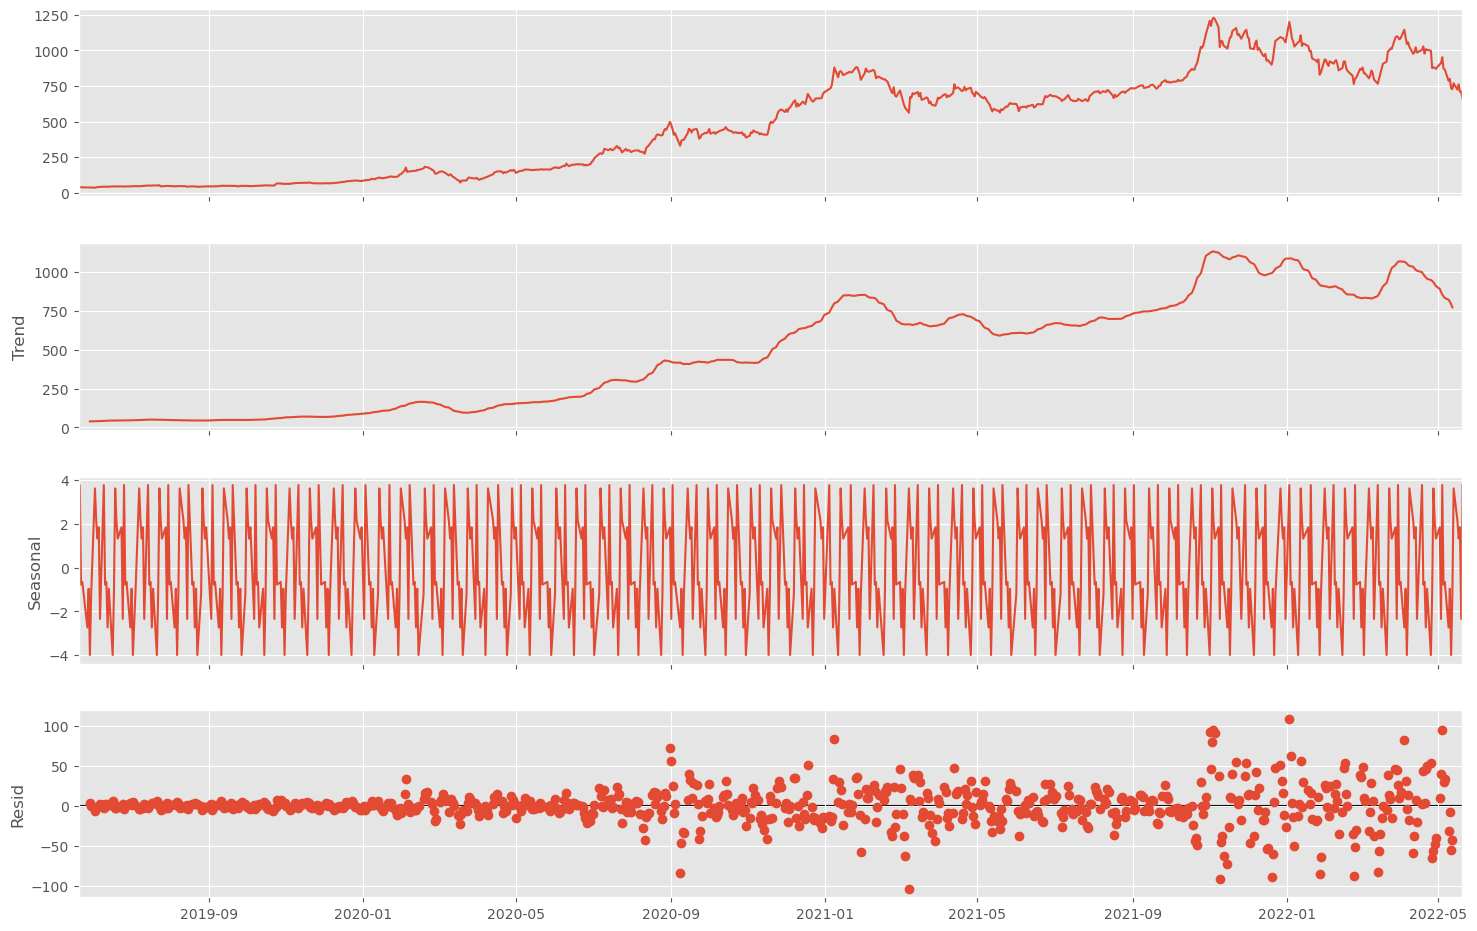

In [96]:
fig=plt.figure(figsize=(20,10))
fig=result.plot()
fig.set_size_inches(17,10)

In [97]:
from statsmodels.tsa.seasonal import seasonal_decompose
result=seasonal_decompose(stock_data[["Close"]],period=12,model="multiplicative")


<Figure size 2000x1000 with 0 Axes>

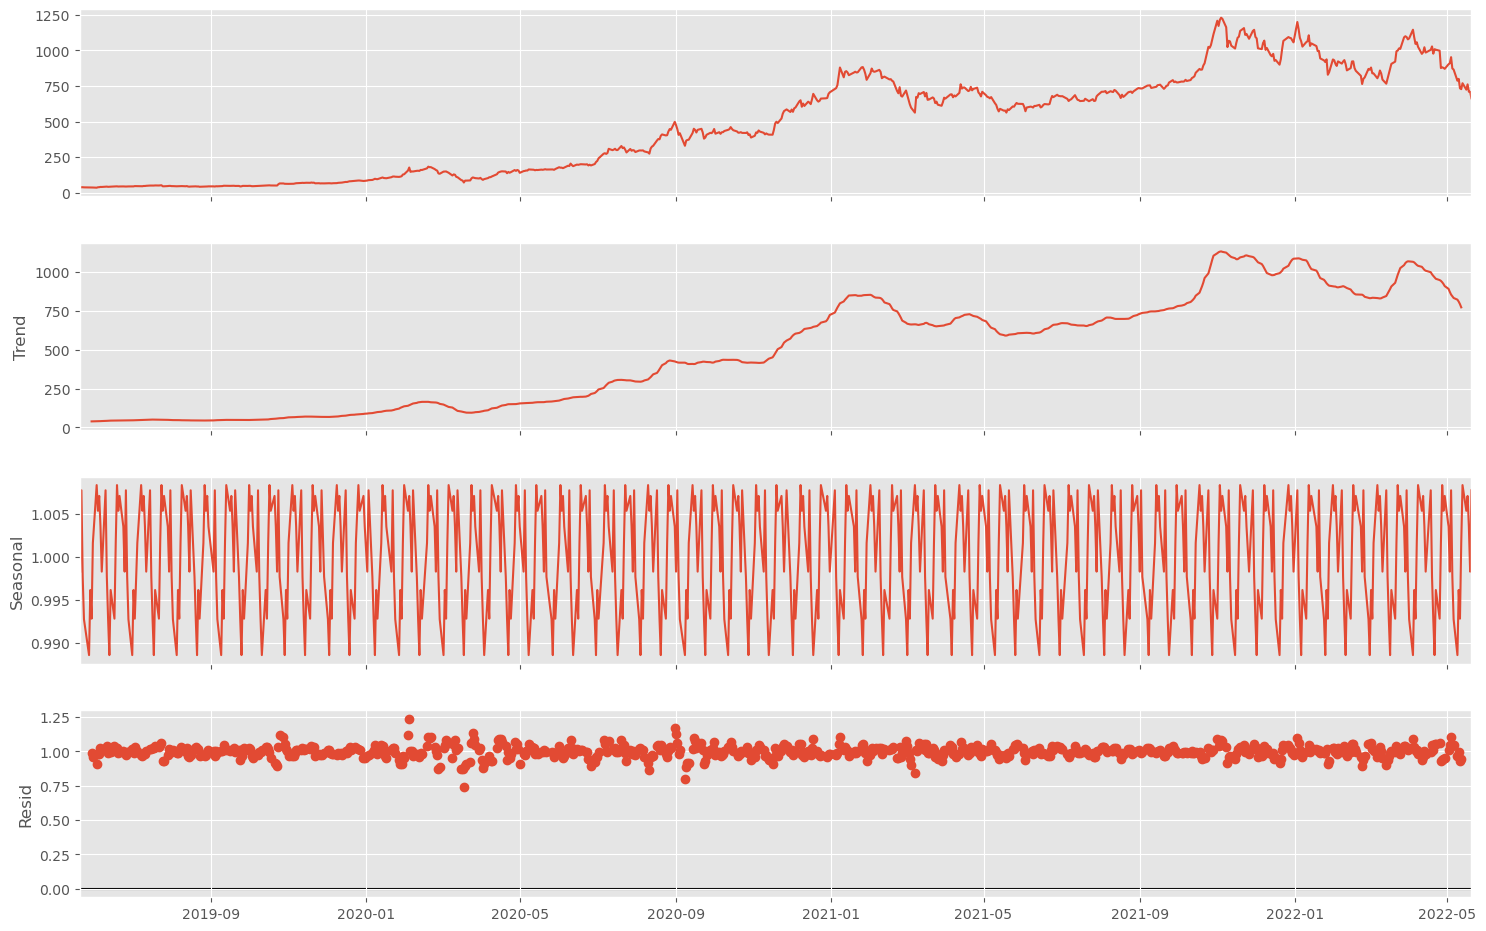

In [98]:
fig=plt.figure(figsize=(20,10))
fig=result.plot()
fig.set_size_inches(17,10)

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\categorical.py:486: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if np.isscalar(data[0]):


<Axes: >

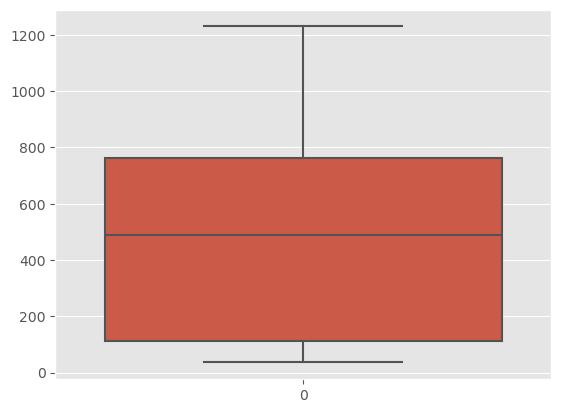

In [99]:
import seaborn as sns
sns.boxplot(stock_data.Close)

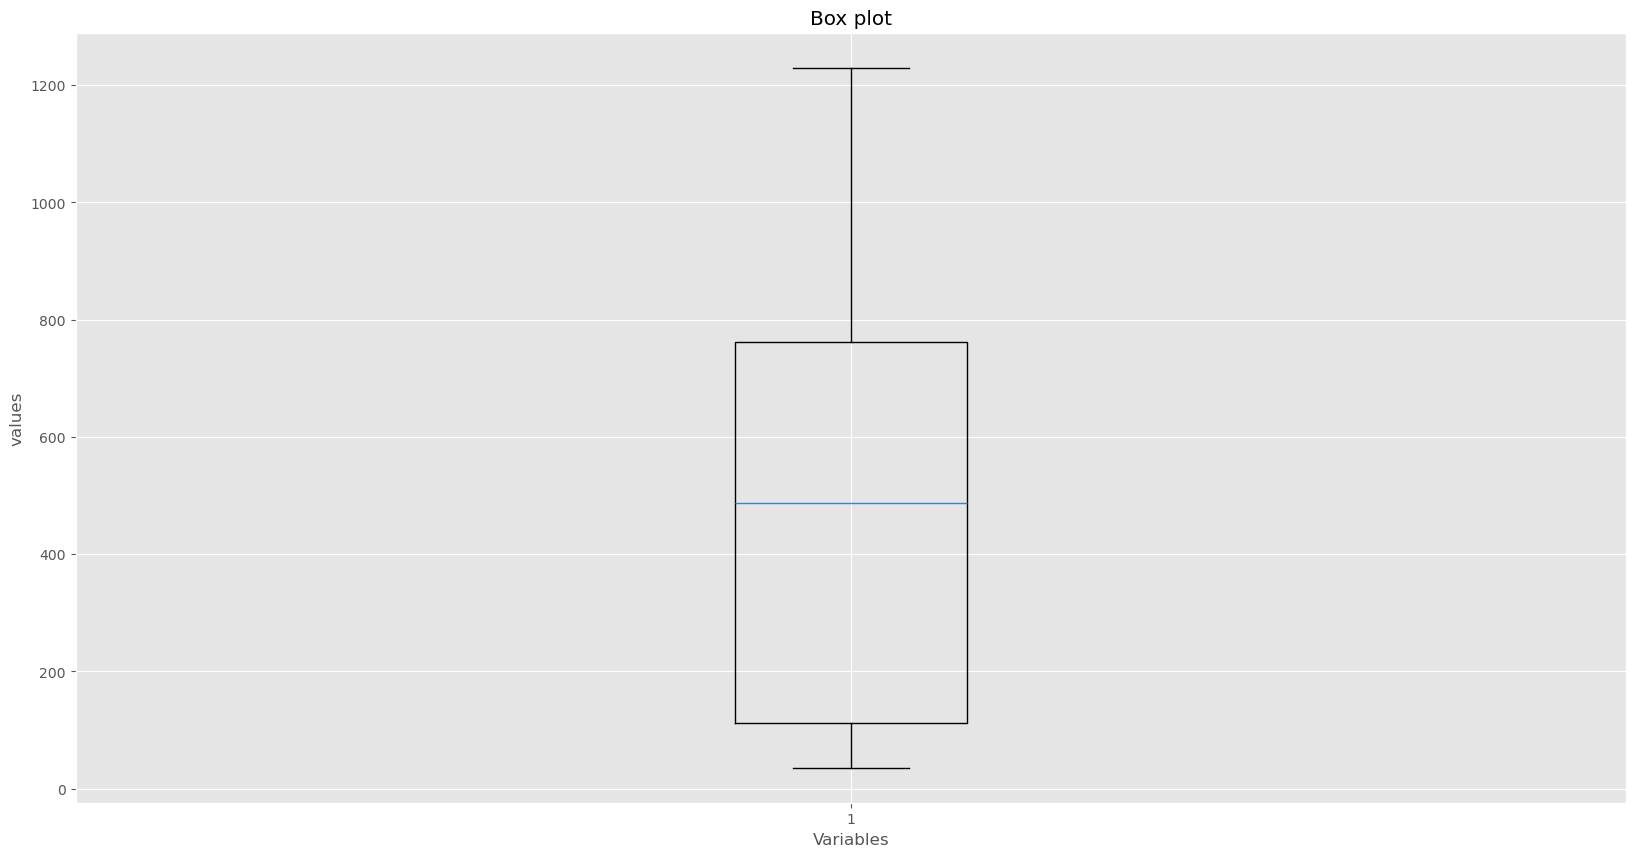

In [100]:
fig,ax=plt.subplots(figsize=(20,10))
ax.boxplot(stock_data['Close'])
ax.set_xlabel('Variables')
ax.set_ylabel('values')
ax.set_title('Box plot')
plt.show()

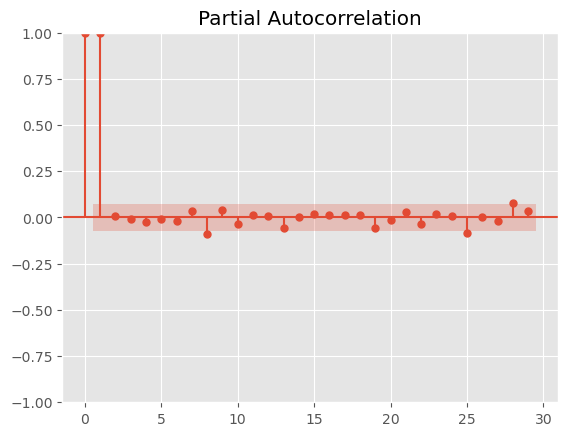

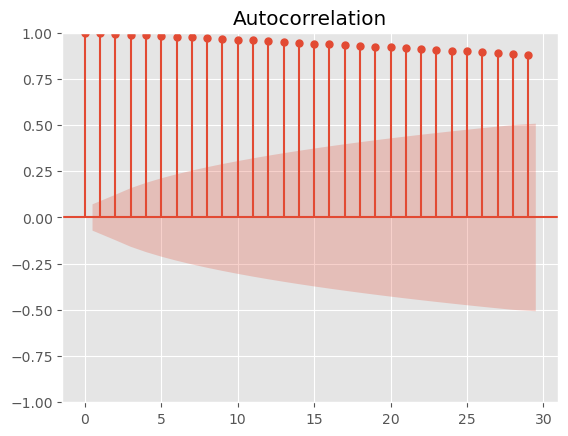

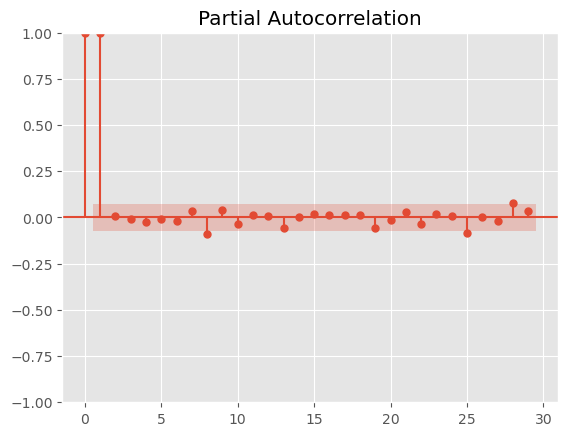

In [101]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(stock_data.Close)
plot_pacf(stock_data.Close)

## Preprocessing Data

In [102]:
df_close=stock_data["Close"]

In [103]:
df_close.diff(2)

Date
2019-05-21          NaN
2019-05-22          NaN
2019-05-23    -1.917999
2019-05-24    -0.420002
2019-05-28    -1.357998
                ...    
2022-05-16    -3.630005
2022-05-17    -7.980042
2022-05-18   -14.559998
2022-05-19   -52.190002
2022-05-20   -45.909973
Name: Close, Length: 758, dtype: float64

In [104]:
df_close.dropna()

Date
2019-05-21     41.015999
2019-05-22     38.546001
2019-05-23     39.098000
2019-05-24     38.125999
2019-05-28     37.740002
                 ...    
2022-05-16    724.369995
2022-05-17    761.609985
2022-05-18    709.809998
2022-05-19    709.419983
2022-05-20    663.900024
Name: Close, Length: 758, dtype: float64

In [105]:
df_close

Date
2019-05-21     41.015999
2019-05-22     38.546001
2019-05-23     39.098000
2019-05-24     38.125999
2019-05-28     37.740002
                 ...    
2022-05-16    724.369995
2022-05-17    761.609985
2022-05-18    709.809998
2022-05-19    709.419983
2022-05-20    663.900024
Name: Close, Length: 758, dtype: float64

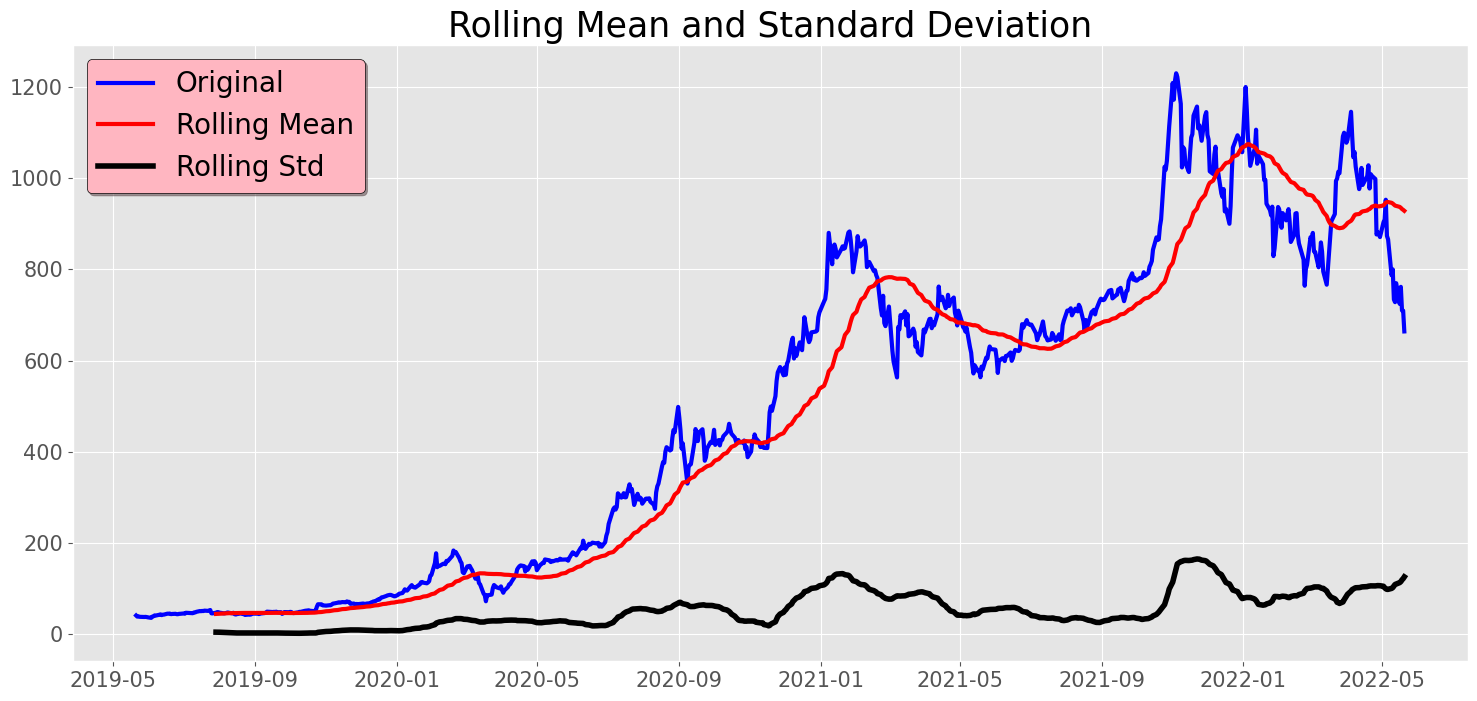

Results of dickey fuller test
Test Statistics                 -1.363009
p-value                          0.599876
No. of lags used                 9.000000
Number of observations used    748.000000
critical value (1%)             -3.439123
critical value (5%)             -2.865412
critical value (10%)            -2.568832
dtype: float64


In [106]:
test_stationarity(df_close)

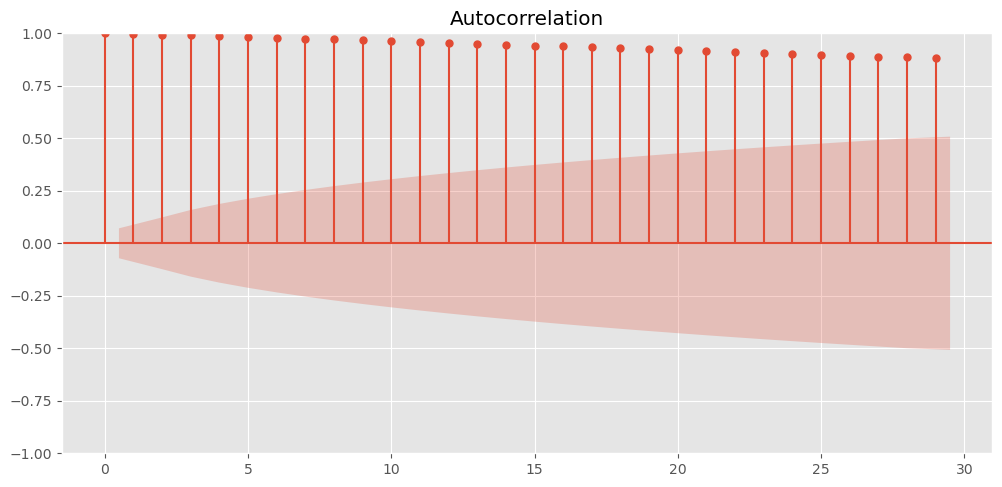

In [107]:
fig=plt.figure(figsize=(12,12))
ax1=fig.add_subplot(211)
fig=plot_acf(df_close,ax=ax1)


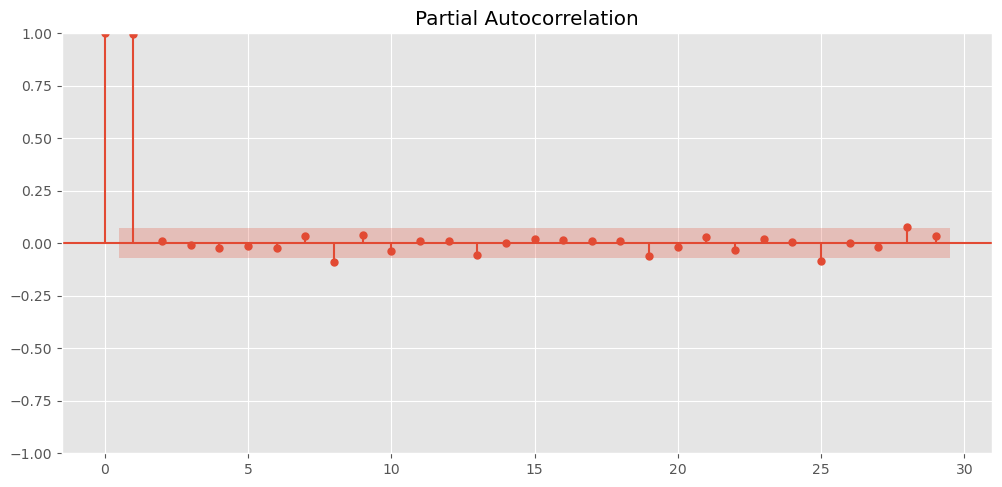

In [108]:
fig=plt.figure(figsize=(12,12))
ax2=fig.add_subplot(211)
fig=plot_pacf(df_close,ax=ax2)

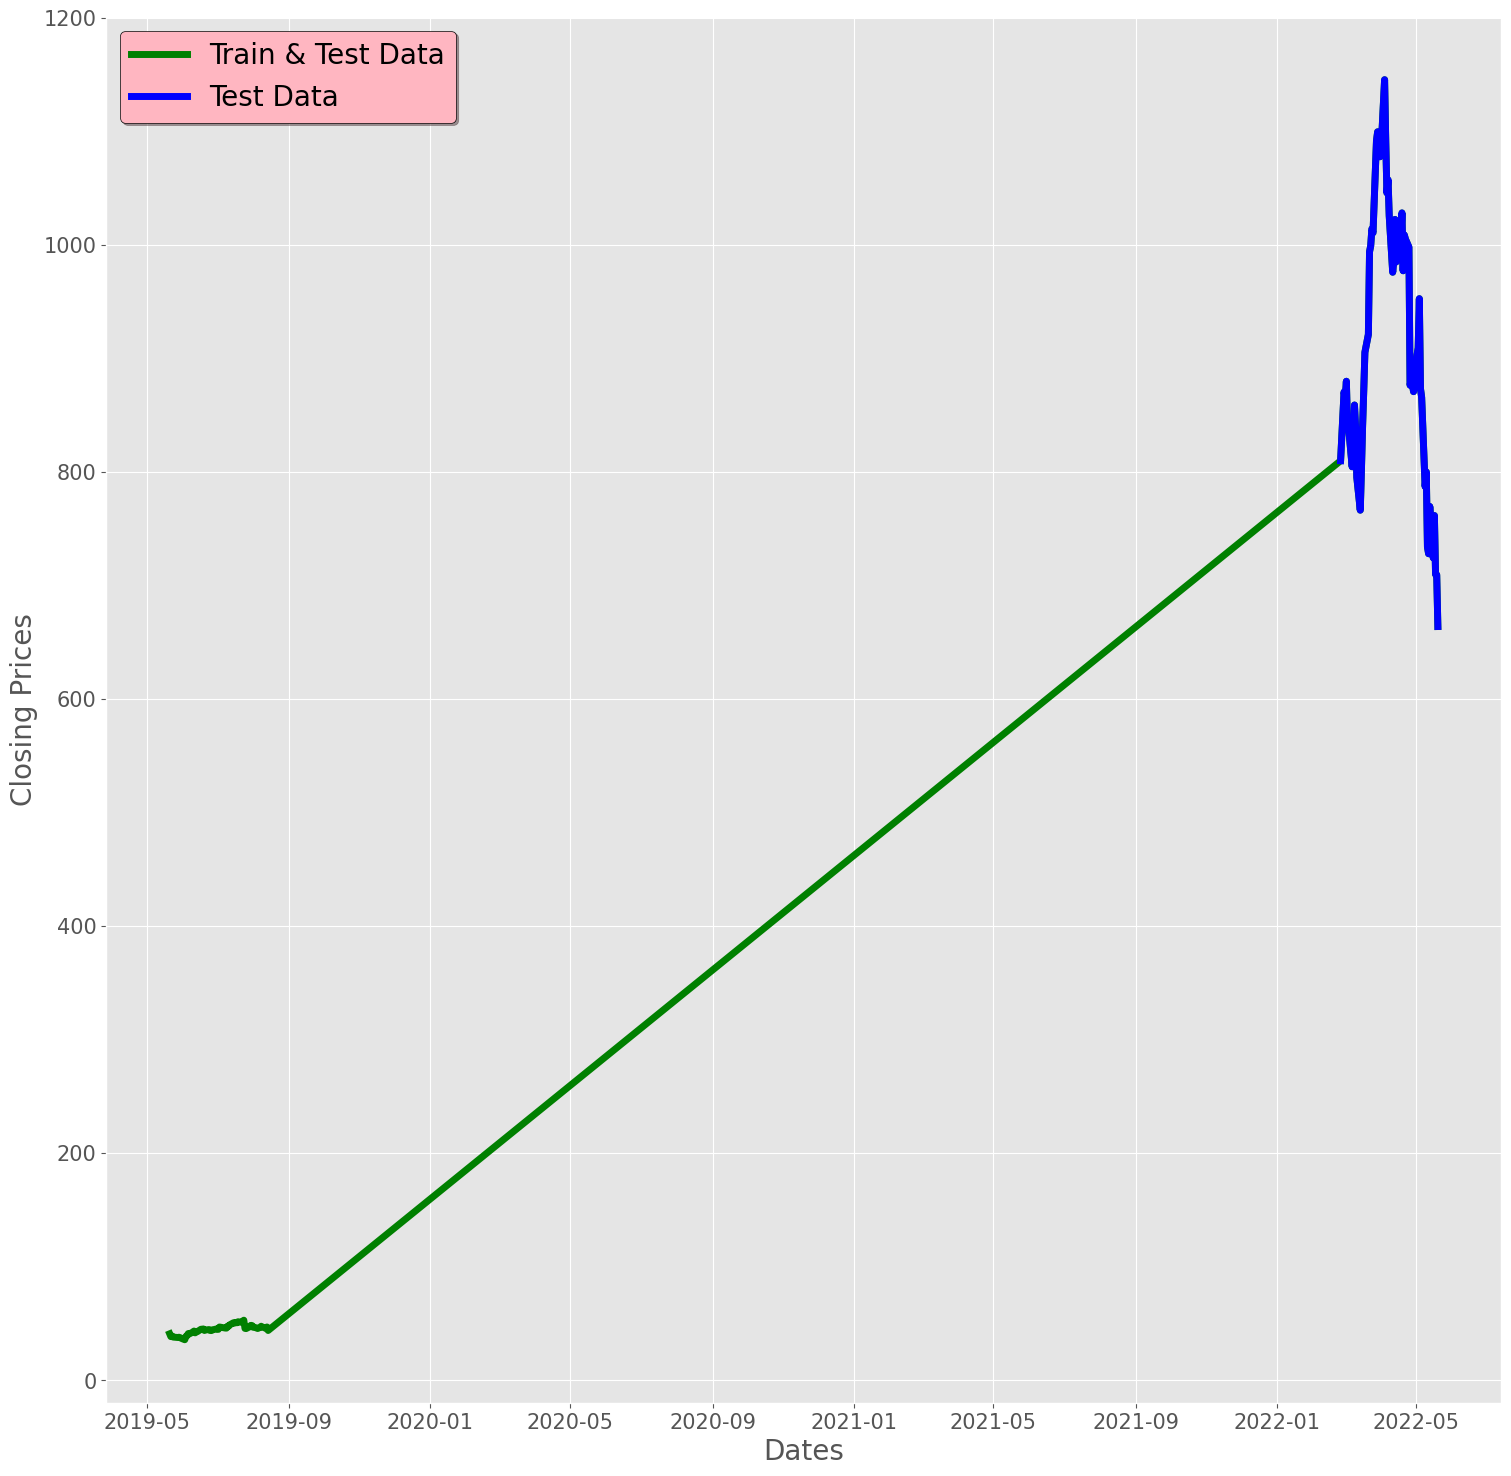

In [122]:
train_data = stock_data["Close"][0:60]
test_data = stock_data["Close"][-60:]

# Combine train and test data for continuous plotting
combined_data = pd.concat([train_data, test_data])

plt.figure(figsize=(18,18))
plt.grid(True)
plt.xlabel('Dates', fontsize=20)
plt.ylabel('Closing Prices', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# Plot combined data with color change to differentiate train and test data
plt.plot(combined_data.index, combined_data, color='green', label='Train & Test Data', linewidth=5)

# Highlight test data specifically
plt.plot(test_data.index, test_data, color='blue', label='Test Data', linewidth=5)

plt.legend(fontsize=20, shadow=True, facecolor='lightpink', edgecolor='k')
plt.show()


## Model Building

In [115]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [116]:
history=[x for x in train_data]

In [123]:
history

[41.01599884033203,
 38.54600143432617,
 39.09799957275391,
 38.1259994506836,
 37.7400016784668,
 37.97200012207031,
 37.64400100708008,
 37.03200149536133,
 35.79399871826172,
 38.720001220703125,
 39.31800079345703,
 41.18999862670898,
 40.900001525878906,
 42.57600021362305,
 43.41999816894531,
 41.85200119018555,
 42.78200149536133,
 42.98400115966797,
 45.00600051879883,
 44.948001861572266,
 45.2859992980957,
 43.92399978637695,
 44.37200164794922,
 44.72800064086914,
 43.95199966430664,
 43.854000091552734,
 44.56800079345703,
 44.69200134277344,
 45.43399810791016,
 44.90999984741211,
 46.97999954223633,
 46.619998931884766,
 46.06800079345703,
 46.012001037597656,
 47.78400039672852,
 47.720001220703125,
 49.01599884033203,
 50.70000076293945,
 50.47600173950195,
 50.97200012207031,
 50.70800018310547,
 51.63600158691406,
 51.13600158691406,
 52.03400039672852,
 52.97600173950195,
 45.76399993896485,
 45.608001708984375,
 47.15399932861328,
 48.45199966430664,
 48.32199859619

In [117]:
model=ARIMA(history,order=(1,1,1))

In [118]:
model=model.fit()

In [119]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   60
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -105.771
Date:                Wed, 02 Oct 2024   AIC                            217.541
Time:                        17:57:38   BIC                            223.774
Sample:                             0   HQIC                           219.974
                                 - 60                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2978      1.053      0.283      0.777      -1.765       2.361
ma.L1         -0.4400      0.965     -0.456      0.648      -2.332       1.452
sigma2         2.1109      0.233      9.055      0.000       1.654       2.568
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               188.35
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               2.16   Skew:                            -1.96
Prob(H) (two-sided):                  0.09   Kurtosis:                        10.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [124]:
model.forecast()[0]

44.321362971008796

In [125]:
test_data[0]

C:\Users\HP\AppData\Local\Temp\ipykernel_7640\2395562395.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  test_data[0]


809.8699951171875

In [126]:
mean_squared_error([test_data[0]],model.forecast())

C:\Users\HP\AppData\Local\Temp\ipykernel_7640\3878667994.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  mean_squared_error([test_data[0]],model.forecast())


586064.7081808853

In [127]:
np.sqrt(mean_squared_error([test_data[0]],model.forecast()))

C:\Users\HP\AppData\Local\Temp\ipykernel_7640\2013795996.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  np.sqrt(mean_squared_error([test_data[0]],model.forecast()))


765.5486321461788

In [131]:
p_value=range(0,3)
d_value=range(0,3)
q_value=range(0,3)

In [133]:
for i in p_value:
    for j in d_value:
        for k in q_value:
          print(i,j,k)
        

0 0 0
0 0 1
0 0 2
0 1 0
0 1 1
0 1 2
0 2 0
0 2 1
0 2 2
1 0 0
1 0 1
1 0 2
1 1 0
1 1 1
1 1 2
1 2 0
1 2 1
1 2 2
2 0 0
2 0 1
2 0 2
2 1 0
2 1 1
2 1 2
2 2 0
2 2 1
2 2 2


In [134]:
def train_arima_model(X, y, arima_order):
    # prepare training dataset
    # make predictions list
    history = [x for x in X]
    predictions = list()
    for t in range(len(y)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(y[t])
    # calculate out of sample error
    rmse = np.sqrt(mean_squared_error(y, predictions))
    return rmse

In [135]:
def evaluate_models(dataset, test, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = train_arima_model(dataset, test, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order, rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))


In [136]:
# evaluate parameters
import warnings
warnings.filterwarnings('ignore')
p_values = range(0, 3)
d_values = range(0, 3)
q_values = range(0, 3)
evaluate_models(train_data, test_data, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=626.423
ARIMA(0, 0, 1) RMSE=367.029
ARIMA(0, 0, 2) RMSE=292.437
ARIMA(0, 1, 0) RMSE=106.480
ARIMA(0, 1, 1) RMSE=109.970
ARIMA(0, 1, 2) RMSE=110.411
ARIMA(0, 2, 0) RMSE=146.415
ARIMA(0, 2, 1) RMSE=127.267
ARIMA(0, 2, 2) RMSE=131.507
ARIMA(1, 0, 0) RMSE=150.026
ARIMA(1, 0, 1) RMSE=159.653
ARIMA(1, 0, 2) RMSE=160.982
ARIMA(1, 1, 0) RMSE=110.560
ARIMA(1, 1, 1) RMSE=110.364
ARIMA(1, 1, 2) RMSE=110.588
ARIMA(1, 2, 0) RMSE=152.458
ARIMA(1, 2, 1) RMSE=135.722
ARIMA(1, 2, 2) RMSE=136.472
ARIMA(2, 0, 0) RMSE=154.454
ARIMA(2, 0, 1) RMSE=158.646
ARIMA(2, 0, 2) RMSE=163.806
ARIMA(2, 1, 0) RMSE=110.501
ARIMA(2, 1, 1) RMSE=110.296
ARIMA(2, 1, 2) RMSE=110.473
ARIMA(2, 2, 0) RMSE=160.585
ARIMA(2, 2, 1) RMSE=139.342
ARIMA(2, 2, 2) RMSE=138.947
Best ARIMA(0, 1, 0) RMSE=106.480


In [137]:
history = [x for x in train_data]
predictions = list()
conf_list = list()
for t in range(len(test_data)):
    model = ARIMA(history,order=(2,0,0))
    model_fit = model.fit()
    fc = model_fit.forecast(alpha = 0.05)
    predictions.append(fc)
    history.append(test_data[t])
print('RMSE of ARIMA Model:', np.sqrt(mean_squared_error(test_data, predictions)))

RMSE of ARIMA Model: 154.45436261969184


In [139]:
test_data

Date
2022-02-25     809.869995
2022-02-28     870.429993
2022-03-01     864.369995
2022-03-02     879.890015
2022-03-03     839.289978
2022-03-04     838.289978
2022-03-07     804.580017
2022-03-08     824.400024
2022-03-09     858.969971
2022-03-10     838.299988
2022-03-11     795.349976
2022-03-14     766.369995
2022-03-15     801.890015
2022-03-16     840.229980
2022-03-17     871.599976
2022-03-18     905.390015
2022-03-21     921.159973
2022-03-22     993.979980
2022-03-23     999.109985
2022-03-24    1013.919983
2022-03-25    1010.640015
2022-03-28    1091.839966
2022-03-29    1099.569946
2022-03-30    1093.989990
2022-03-31    1077.599976
2022-04-01    1084.589966
2022-04-04    1145.449951
2022-04-05    1091.260010
2022-04-06    1045.760010
2022-04-07    1057.260010
2022-04-08    1025.489990
2022-04-11     975.929993
2022-04-12     986.950012
2022-04-13    1022.369995
2022-04-14     985.000000
2022-04-18    1004.289978
2022-04-19    1028.150024
2022-04-20     977.200012
2022-04

In [141]:
predictions

[array([44.21299032]),
 array([49.05896181]),
 array([623.97689479]),
 array([789.59111973]),
 array([834.3835668]),
 array([790.73257511]),
 array([796.56040978]),
 array([766.95541254]),
 array([796.9971883]),
 array([836.13966522]),
 array([811.19806208]),
 array([766.92545219]),
 array([740.70736331]),
 array([784.02602464]),
 array([823.72756542]),
 array([855.4608238]),
 array([887.59500851]),
 array([905.41788826]),
 array([984.96898508]),
 array([981.53822389]),
 array([1000.66829648]),
 array([996.18091125]),
 array([1086.21281715]),
 array([1085.4046849]),
 array([1081.10084752]),
 array([1062.00303544]),
 array([1073.69117242]),
 array([1138.13498669]),
 array([1073.73523383]),
 array([1030.83003438]),
 array([1047.81252018]),
 array([1010.90414522]),
 array([960.07155654]),
 array([976.83347858]),
 array([1014.50480114]),
 array([971.18796935]),
 array([995.53302336]),
 array([1019.91135156]),
 array([963.14066425]),
 array([1001.57034652]),
 array([995.26686989]),
 array([

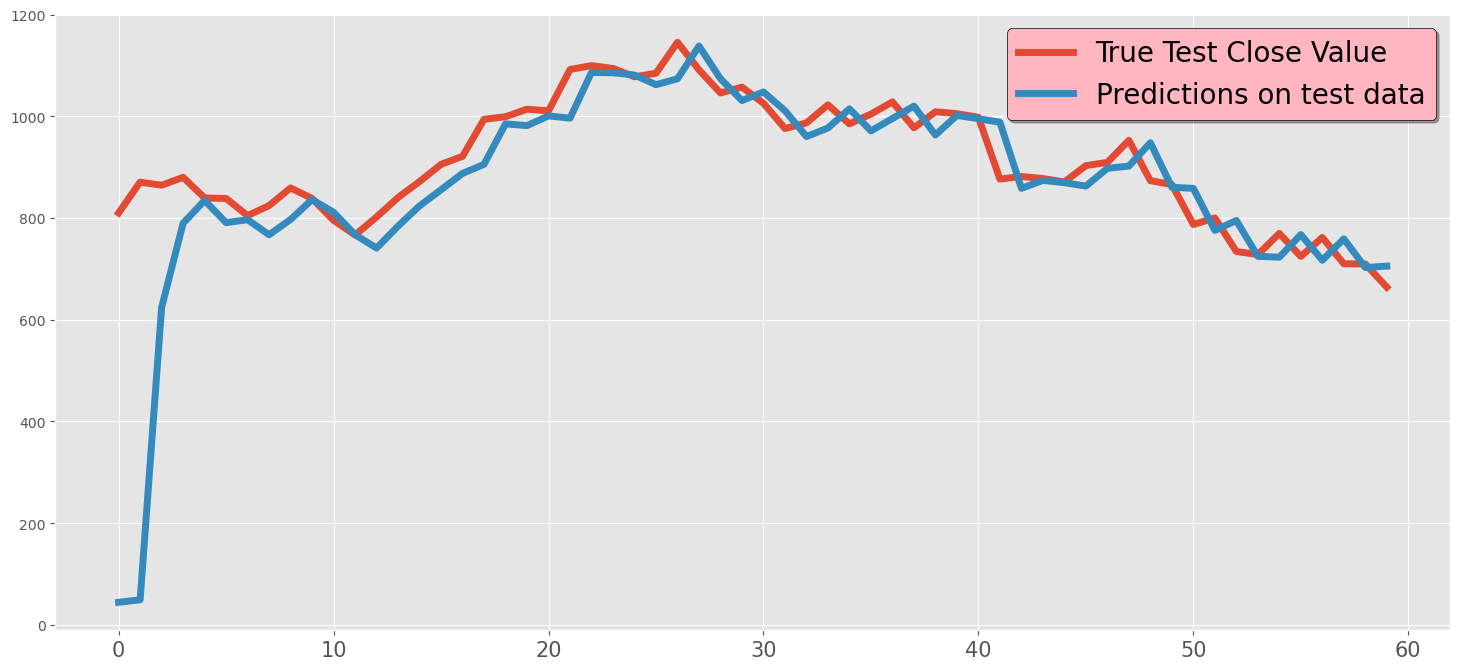

In [142]:
plt.figure(figsize=(18,8))
plt.grid(True)
plt.plot(range(len(test_data)),test_data, label = 'True Test Close Value', linewidth = 5)
plt.plot(range(len(predictions)), predictions, label = 'Predictions on test data', linewidth = 5)
plt.xticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.legend(fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')
plt.show()

In [143]:
fc_series = pd.Series(predictions, index=test_data.index)

In [144]:
fc_series

Date
2022-02-25     [44.21299031975753]
2022-02-28     [49.05896180591419]
2022-03-01     [623.9768947918602]
2022-03-02     [789.5911197269043]
2022-03-03     [834.3835668046461]
2022-03-04     [790.7325751131307]
2022-03-07     [796.5604097774128]
2022-03-08     [766.9554125416613]
2022-03-09     [796.9971882983655]
2022-03-10     [836.1396652232361]
2022-03-11     [811.1980620757947]
2022-03-14     [766.9254521866782]
2022-03-15      [740.707363311938]
2022-03-16     [784.0260246399125]
2022-03-17     [823.7275654165048]
2022-03-18     [855.4608238047228]
2022-03-21     [887.5950085083346]
2022-03-22     [905.4178882563453]
2022-03-23     [984.9689850781222]
2022-03-24     [981.5382238865901]
2022-03-25    [1000.6682964768462]
2022-03-28     [996.1809112493626]
2022-03-29    [1086.2128171481768]
2022-03-30     [1085.404684899952]
2022-03-31    [1081.1008475212063]
2022-04-01    [1062.0030354391815]
2022-04-04    [1073.6911724191477]
2022-04-05    [1138.1349866896846]
2022-04-06    [